In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Dataset/digits.csv")
df

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [5]:
df.shape

(42000, 785)

In [12]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

<AxesSubplot:xlabel='label', ylabel='count'>

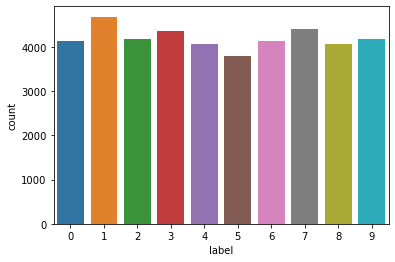

In [13]:
sns.countplot(data=df,x=y)

In [14]:
x.sample(1)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
20643       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
20643       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
20643         0         0         0         0         0  

[1 rows x 784 columns]

Text(0.5, 1.0, 'Number is 5')

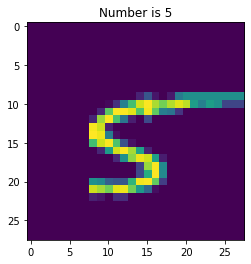

In [19]:
plt.imshow(x.iloc[244,:].values.reshape(28,28))
plt.title(f"Number is {y[244]}")

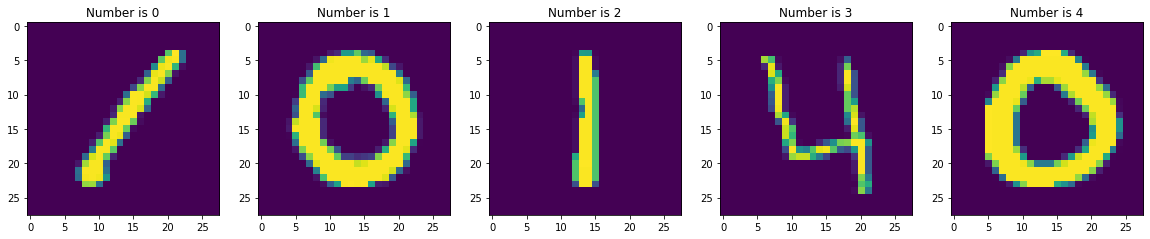

In [23]:
plt.figure(figsize=(20,15))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x.iloc[i,:].values.reshape(28,28))
    plt.title(f"Number is {i}")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
x_train.shape

(29400, 784)

In [26]:
x_test.shape

(12600, 784)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier()

In [29]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=knn.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9657142857142857

In [35]:
from sklearn.preprocessing import StandardScaler

In [39]:
std=StandardScaler()
x_train_trf=std.fit_transform(x_train)
x_test_trf=std.fit_transform(x_test)

In [40]:
x_train_trf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [49]:
pca=PCA(n_components=100)

In [50]:
x_train_pca=pca.fit_transform(x_train_trf)
x_test_pca=pca.transform(x_test)

In [51]:
x_train_pca.shape

(29400, 100)

In [52]:
knn_pca=KNeighborsClassifier()
knn_pca.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [54]:
y_pred_pca=knn_pca.predict(x_test_pca)

In [55]:
y_pred_pca

array([0, 6, 9, ..., 1, 6, 0], dtype=int64)

In [56]:
accuracy_score(y_test,y_pred_pca)

0.7669047619047619

In [63]:
for i in range(1,785):
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train_trf)
    x_test_pca=pca.transform(x_test)
    knn.fit(x_train_pca,y_train)
    y_pred_pca=knn.predict(x_test_pca)
    print(f"Iteration :{i} {accuracy_score(y_test,y_pred_pca)}")

Iteration :1 0.18611111111111112
Iteration :2 0.1353174603174603
Iteration :3 0.2311111111111111
Iteration :4 0.25936507936507935
Iteration :5 0.36293650793650795
Iteration :6 0.40253968253968253
Iteration :7 0.43047619047619046
Iteration :8 0.47015873015873016
Iteration :9 0.4720634920634921
Iteration :10 0.4638888888888889
Iteration :11 0.4718253968253968
Iteration :12 0.48174603174603176
Iteration :13 0.5541269841269841
Iteration :14 0.5725396825396826


KeyboardInterrupt: 

In [60]:
pca_dim=PCA(n_components=2)
x_train_pca=pca_dim.fit_transform(x_train_trf)
x_test_pca=pca_dim.transform(x_test)
x_train_pca.shape

(29400, 2)

In [76]:
x_train_pca[:,0].shape

(29400,)

In [74]:
import plotly.express as px
px.scatter(x_train_pca[:,0],x_train_pca[:,1],color=y_train)

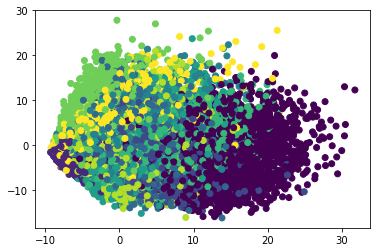

In [64]:
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)

In [65]:
three_3d_train=pca.fit_transform(x_train_trf)
three_3d_test=pca.transform(x_test_trf)

In [66]:
three_3d_train[2]

array([-3.90003789,  4.91830035, -4.63366877,  3.27091033, -3.64462228,
       -0.88119477,  3.5309559 , -3.53691976,  1.28522975, -0.58854309,
        0.93302837,  2.41807578, -2.52540961,  0.68223016, -5.37423184])

In [75]:
px.scatter_3d(x=three_3d_train[:,0],y=three_3d_train[:,1],z=three_3d_train[:,2],color=y_train)

In [77]:
(pca.explained_variance_ratio_)*100

array([5.84935171, 4.22455317, 3.84790932, 2.9956641 , 2.60283758,
       2.27062308, 2.00722686, 1.80402701, 1.60329483, 1.45268023,
       1.40016868, 1.25490541, 1.15570598, 1.1368944 , 1.07821511])

In [78]:
pca_dim=PCA(n_components=None)
x_train_pca=pca_dim.fit_transform(x_train_trf)
x_test_pca=pca_dim.transform(x_test)
pca.explained_variance_

array([40.59588171, 29.31939629, 26.70539899, 20.79061603, 18.06430724,
       15.75866016, 13.93062822, 12.52037332, 11.12724459, 10.0819437 ,
        9.71750119,  8.70933979,  8.02087231,  7.89031548,  7.48306737])

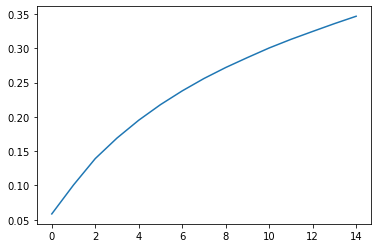

In [79]:
np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))